In [1]:
import geopandas as gpd

In [2]:
import geoplot as gplt

In [3]:
#world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [4]:
#world.head()

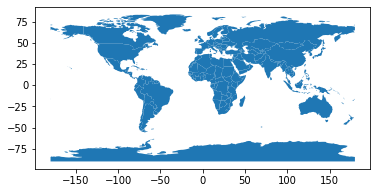

In [5]:
#world.plot();

In [6]:
import pandas as pd

In [16]:
tweetData = pd.read_csv("all_classifications.csv")

In [17]:
tweetData

,Tweet ID,Label
0,1242513753733808128,Hate
1,1242420844111917056,Neutral
2,1242521583622574080,Neutral
3,1242432191138648064,Neutral
4,1242355882119155713,Hate
...,...,...
30929264,1246259863845511169,Neutral
30929265,1246226981760438275,Neutral
30929266,1246274078274658305,Neutral
30929267,1246463289774592000,Neutral


In [10]:
geolocationData = pd.read_csv("geolocations.csv")

In [14]:
geolocationData

,Tweet ID,User ID,Country,State,County,City,Latitude,Longitude
0,1242420844111917056,980248194280972288,in,Rajasthan,Makrana Tehsil,None,27.038810,74.727117
1,1242414608608083968,720588875417128960,gb,England,Essex,None,51.796699,0.579337
2,1242480439157293056,1590022039,us,Florida,Pinellas County,Pinellas Park,27.842803,-82.699544
3,1242437817910865920,932781,us,Mississippi,Harrison County,Long Beach,30.350475,-89.152818
4,1242402932718473216,760883833,us,Florida,Highlands County,Sebring,27.495745,-81.441043
...,...,...,...,...,...,...,...,...
6548318,1246455507323240448,47564231,us,California,San Diego,None,32.963784,-116.770628
6548319,1246547832384831488,211496233,us,Idaho,None,None,43.644764,-114.015407
6548320,1246466216887291904,23033421,us,New York,None,None,40.712728,-74.006015
6548321,1246340882795622400,2207681071,in,Mizoram,Tlangnuam,Aizawl,23.741409,92.720930


In [18]:
result = geolocationData.set_index("Tweet ID").join(tweetData.set_index("Tweet ID"))

In [19]:
result

,User ID,Country,State,County,City,Latitude,Longitude,Label
Tweet ID,,,,,,,,
1242420844111917056,980248194280972288,in,Rajasthan,Makrana Tehsil,None,27.038810,74.727117,Neutral
1242414608608083968,720588875417128960,gb,England,Essex,None,51.796699,0.579337,Neutral
1242480439157293056,1590022039,us,Florida,Pinellas County,Pinellas Park,27.842803,-82.699544,Neutral
1242437817910865920,932781,us,Mississippi,Harrison County,Long Beach,30.350475,-89.152818,Neutral
1242402932718473216,760883833,us,Florida,Highlands County,Sebring,27.495745,-81.441043,Other
...,...,...,...,...,...,...,...,...
1246455507323240448,47564231,us,California,San Diego,None,32.963784,-116.770628,Neutral
1246547832384831488,211496233,us,Idaho,None,None,43.644764,-114.015407,Neutral
1246466216887291904,23033421,us,New York,None,None,40.712728,-74.006015,Other


In [34]:

labels = []

for tweet in result["Label"]:
    if tweet == "Hate": 
        colorVal = 4
    elif tweet == "Counterhate":
        colorVal = 3
    elif tweet == "Neutral":
        colorVal = 2
    elif tweet == "Other":
        colorVal = 1
    else:
        colorVal = 0
    labels.append(colorVal)


In [21]:
result = result.assign(Color = labels)

In [22]:
result

,User ID,Country,State,County,City,Latitude,Longitude,Label,Color
Tweet ID,,,,,,,,,
1242420844111917056,980248194280972288,in,Rajasthan,Makrana Tehsil,None,27.038810,74.727117,Neutral,3
1242414608608083968,720588875417128960,gb,England,Essex,None,51.796699,0.579337,Neutral,3
1242480439157293056,1590022039,us,Florida,Pinellas County,Pinellas Park,27.842803,-82.699544,Neutral,3
1242437817910865920,932781,us,Mississippi,Harrison County,Long Beach,30.350475,-89.152818,Neutral,3
1242402932718473216,760883833,us,Florida,Highlands County,Sebring,27.495745,-81.441043,Other,4
...,...,...,...,...,...,...,...,...,...
1246455507323240448,47564231,us,California,San Diego,None,32.963784,-116.770628,Neutral,3
1246547832384831488,211496233,us,Idaho,None,None,43.644764,-114.015407,Neutral,3
1246466216887291904,23033421,us,New York,None,None,40.712728,-74.006015,Other,4


In [23]:
#result.plot(x='Color')

In [24]:
#world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
#world.plot()

In [25]:
#world = world.assign(color=labels)

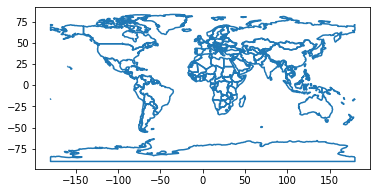

In [26]:
#world.boundary.plot()

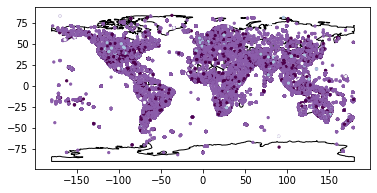

In [35]:
geoResult = gpd.GeoDataFrame(result, geometry=gpd.points_from_xy(result.Longitude, result.Latitude))
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
base = world.plot(color='white', edgecolor='black')
geoResult.plot(ax=base, marker='o', column="Color", markersize=5, cmap='BuPu')